In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
prolongations = pd.read_csv('prolongations.csv')
financial_data = pd.read_csv('financial_data.csv')

In [3]:
prolongations

,id,month,AM
0,42,ноябрь 2022,Васильев Артем Александрович
1,453,ноябрь 2022,Васильев Артем Александрович
2,548,ноябрь 2022,Михайлов Андрей Сергеевич
3,87,ноябрь 2022,Соколова Анастасия Викторовна
4,429,ноябрь 2022,Соколова Анастасия Викторовна
...,...,...,...
472,955,декабрь 2023,Смирнова Ольга Владимировна
473,1004,декабрь 2023,без А/М
474,281,декабрь 2023,Соколова Анастасия Викторовна
475,785,декабрь 2023,Соколова Анастасия Викторовна


In [4]:
financial_data

,id,Причина дубля,Ноябрь 2022,Декабрь 2022,Январь 2023,Февраль 2023,Март 2023,Апрель 2023,Май 2023,Июнь 2023,Июль 2023,Август 2023,Сентябрь 2023,Октябрь 2023,Ноябрь 2023,Декабрь 2023,Январь 2024,Февраль 2024,Account
0,42,NaN,"36 220,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
1,657,первая часть оплаты,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
2,657,вторая часть оплаты,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
3,594,NaN,стоп,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
4,665,NaN,"10 000,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Васильев Артем Александрович
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,281,основные работы,"76 550,00","79 950,00","66 900,00","89 150,00","108 450,00","77 100,00","78 800,00","126 740,00","117 730,00","115 860,00","160 770,00","142 490,00","99 125,00","74 350,00","105 775,00","92 065,00",Соколова Анастасия Викторовна
447,281,доп работы,"21 450,00","13 300,00","15 900,00","19 850,00","17 350,00","14 650,00","15 900,00","3 000,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Соколова Анастасия Викторовна
448,785,NaN,NaN,NaN,NaN,"5 306,60","12 898,10","5 287,00","10 180,00","8 600,00","3 860,00","8 600,00","700,00","700,00",в ноль,в ноль,NaN,NaN,Соколова Анастасия Викторовна
449,913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"58 200,00","58 200,00","58 200,00","58 200,00","58 200,00","58 200,00",NaN,NaN,Смирнова Ольга Владимировна


In [5]:
month_translation = {
    'Январь': 'January',
    'Февраль': 'February',
    'Март': 'March',
    'Апрель': 'April',
    'Май': 'May',
    'Июнь': 'June',
    'Июль': 'July',
    'Август': 'August',
    'Сентябрь': 'September',
    'Октябрь': 'October',
    'Ноябрь': 'November',
    'Декабрь': 'December',
    'январь': 'January',
    'февраль': 'February',
    'март': 'March',
    'апрель': 'April',
    'май': 'May',
    'июнь': 'June',
    'июль': 'July',
    'август': 'August',
    'сентябрь': 'September',
    'октябрь': 'October',
    'ноябрь': 'November',
    'декабрь': 'December'
}

In [6]:
# Преобразуем данные в удобный формат
financial_data = financial_data.melt(id_vars=['id', 'Причина дубля', 'Account'], 
                                    var_name='month', 
                                    value_name='amount')

In [7]:
financial_data

,id,Причина дубля,Account,month,amount
0,42,NaN,Васильев Артем Александрович,Ноябрь 2022,"36 220,00"
1,657,первая часть оплаты,Васильев Артем Александрович,Ноябрь 2022,стоп
2,657,вторая часть оплаты,Васильев Артем Александрович,Ноябрь 2022,стоп
3,594,NaN,Васильев Артем Александрович,Ноябрь 2022,стоп
4,665,NaN,Васильев Артем Александрович,Ноябрь 2022,"10 000,00"
...,...,...,...,...,...
7211,281,основные работы,Соколова Анастасия Викторовна,Февраль 2024,"92 065,00"
7212,281,доп работы,Соколова Анастасия Викторовна,Февраль 2024,NaN
7213,785,NaN,Соколова Анастасия Викторовна,Февраль 2024,NaN
7214,913,NaN,Смирнова Ольга Владимировна,Февраль 2024,NaN


In [8]:
# Функция для перевода и преобразования
def translate_and_convert(date_str):
    for rus, eng in month_translation.items():
        if rus in date_str:
            date_str = date_str.replace(rus, eng)
            break
    return pd.to_datetime(date_str, format='%B %Y')

# Применяем функцию к столбцу 'month'
financial_data['month'] = financial_data['month'].apply(translate_and_convert)

In [9]:
financial_data

,id,Причина дубля,Account,month,amount
0,42,NaN,Васильев Артем Александрович,2022-11-01,"36 220,00"
1,657,первая часть оплаты,Васильев Артем Александрович,2022-11-01,стоп
2,657,вторая часть оплаты,Васильев Артем Александрович,2022-11-01,стоп
3,594,NaN,Васильев Артем Александрович,2022-11-01,стоп
4,665,NaN,Васильев Артем Александрович,2022-11-01,"10 000,00"
...,...,...,...,...,...
7211,281,основные работы,Соколова Анастасия Викторовна,2024-02-01,"92 065,00"
7212,281,доп работы,Соколова Анастасия Викторовна,2024-02-01,NaN
7213,785,NaN,Соколова Анастасия Викторовна,2024-02-01,NaN
7214,913,NaN,Смирнова Ольга Владимировна,2024-02-01,NaN


In [10]:
prolongations['month'] = prolongations['month'].apply(translate_and_convert)

In [11]:
prolongations

,id,month,AM
0,42,2022-11-01,Васильев Артем Александрович
1,453,2022-11-01,Васильев Артем Александрович
2,548,2022-11-01,Михайлов Андрей Сергеевич
3,87,2022-11-01,Соколова Анастасия Викторовна
4,429,2022-11-01,Соколова Анастасия Викторовна
...,...,...,...
472,955,2023-12-01,Смирнова Ольга Владимировна
473,1004,2023-12-01,без А/М
474,281,2023-12-01,Соколова Анастасия Викторовна
475,785,2023-12-01,Соколова Анастасия Викторовна


In [12]:
# Убираем строки с 'стоп' и 'end'
financial_data = financial_data[~financial_data['amount'].isin(['стоп', 'end'])]

In [13]:
financial_data

,id,Причина дубля,Account,month,amount
0,42,NaN,Васильев Артем Александрович,2022-11-01,"36 220,00"
4,665,NaN,Васильев Артем Александрович,2022-11-01,"10 000,00"
5,637,NaN,Соколова Анастасия Викторовна,2022-11-01,"38 045,00"
6,419,NaN,Михайлов Андрей Сергеевич,2022-11-01,NaN
7,578,NaN,Попова Екатерина Николаевна,2022-11-01,"82 800,00"
...,...,...,...,...,...
7211,281,основные работы,Соколова Анастасия Викторовна,2024-02-01,"92 065,00"
7212,281,доп работы,Соколова Анастасия Викторовна,2024-02-01,NaN
7213,785,NaN,Соколова Анастасия Викторовна,2024-02-01,NaN
7214,913,NaN,Смирнова Ольга Владимировна,2024-02-01,NaN


In [14]:
# Заменяем 'в ноль' на 0
financial_data['amount'] = financial_data['amount'].replace('в ноль', '0')

# Удаляем неразрывные пробелы и заменяем запятые на точки
financial_data['amount'] = financial_data['amount'].str.replace('\xa0', '').str.replace(',', '.')

# Преобразуем в float
financial_data['amount'] = financial_data['amount'].astype(float)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [15]:
financial_data.loc[financial_data['amount'].isin([0])]

,id,Причина дубля,Account,month,amount
8,579,NaN,Васильев Артем Александрович,2022-11-01,0.0
12,620,NaN,Васильев Артем Александрович,2022-11-01,0.0
27,613,первая часть оплаты,Васильев Артем Александрович,2022-11-01,0.0
28,615,первая часть оплаты,Васильев Артем Александрович,2022-11-01,0.0
29,617,первая часть оплаты,Васильев Артем Александрович,2022-11-01,0.0
...,...,...,...,...,...
7001,676,вторая часть оплаты,Смирнова Ольга Владимировна,2024-02-01,0.0
7016,872,доп работы,Попова Екатерина Николаевна,2024-02-01,0.0
7046,943,вторая часть оплаты,Смирнова Ольга Владимировна,2024-02-01,0.0
7083,954,NaN,Соколова Анастасия Викторовна,2024-02-01,0.0


In [16]:
financial_data.dtypes

id                        int64
Причина дубля            object
Account                  object
month            datetime64[ns]
amount                  float64
dtype: object

In [17]:
# Создаем пустой DataFrame для хранения результатов
results = pd.DataFrame(columns=['AM', 'month', 'first_month_coef', 'second_month_coef'])

# Уникальные месяцы и менеджеры
unique_months = financial_data['month'].unique()
unique_managers = prolongations['AM'].unique()

In [18]:
unique_months

array(['2022-11-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000',
       '2023-01-01T00:00:00.000000000', '2023-02-01T00:00:00.000000000',
       '2023-03-01T00:00:00.000000000', '2023-04-01T00:00:00.000000000',
       '2023-05-01T00:00:00.000000000', '2023-06-01T00:00:00.000000000',
       '2023-07-01T00:00:00.000000000', '2023-08-01T00:00:00.000000000',
       '2023-09-01T00:00:00.000000000', '2023-10-01T00:00:00.000000000',
       '2023-11-01T00:00:00.000000000', '2023-12-01T00:00:00.000000000',
       '2024-01-01T00:00:00.000000000', '2024-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [19]:
unique_managers

array(['Васильев Артем Александрович', 'Михайлов Андрей Сергеевич',
       'Соколова Анастасия Викторовна', 'Иванова Мария Сергеевна',
       'Попова Екатерина Николаевна', 'Смирнова Ольга Владимировна',
       'Кузнецов Михаил Иванович', 'без А/М', 'Петрова Анна Дмитриевна',
       'Федорова Марина Васильевна'], dtype=object)

In [20]:
month_translation_rus = {
    'January': 'Январь',
    'February': 'Февраль',
    'March': 'Март',
    'April': 'Апрель',
    'May': 'Май',
    'June': 'Июнь',
    'July': 'Июль',
    'August': 'Август',
    'September': 'Сентябрь',
    'October': 'Октябрь',
    'November': 'Ноябрь',
    'December': 'Декабрь'
}

In [21]:
# Создаем пустой DataFrame для хранения результатов
results = []

# Проходим по каждому месяцу 2023 года
for month in pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS'):
    prev_month = month - pd.DateOffset(months=1)
    two_months_ago = month - pd.DateOffset(months=2)

    # Фильтруем данные для первого месяца
    first_month_projects = prolongations[prolongations['month'] == prev_month]
    first_month_financial = financial_data[
        (financial_data['month'] == prev_month) & 
        (~financial_data['amount'].isin(['стоп', 'end']))
    ]

    # Фильтруем данные для второго месяца
    second_month_projects = prolongations[prolongations['month'] == two_months_ago]
    second_month_financial = financial_data[
        (financial_data['month'] == two_months_ago) & 
        (~financial_data['amount'].isin(['стоп', 'end']))
    ]

    # Сумма отгрузки за последний месяц реализации (первый месяц)
    total_first_month = first_month_financial.groupby('Account')['amount'].sum()

    # Сумма отгрузки за текущий месяц для пролонгированных проектов (первый месяц)
    prolonged_first_month = financial_data[
        (financial_data['month'] == month) & 
        (financial_data['id'].isin(first_month_projects['id'])) & 
        (financial_data['amount'] > 0)
    ].groupby('Account')['amount'].sum()

    # Коэффициент пролонгации в первый месяц
    first_month_ratio = (prolonged_first_month / total_first_month).fillna(0)

    # Сумма отгрузки за два месяца назад (второй месяц)
    total_second_month = second_month_financial.groupby('Account')['amount'].sum()

    # Сумма отгрузки за текущий месяц для проектов, не пролонгированных в первый месяц (второй месяц)
    prolonged_second_month = financial_data[
        (financial_data['month'] == month) & 
        (financial_data['id'].isin(second_month_projects['id'])) & 
        (~financial_data['id'].isin(first_month_projects['id'])) & 
        (financial_data['amount'] > 0)
    ].groupby('Account')['amount'].sum()

    # Коэффициент пролонгации во второй месяц
    second_month_ratio = (prolonged_second_month / total_second_month).fillna(0)

    # Сохраняем результаты для каждого менеджера
    for manager in unique_managers:
        results.append({
            'AM': manager,
            'month': month.strftime('%B %Y'),
            'first_month_coef': first_month_ratio.get(manager, 0),
            'second_month_coef': second_month_ratio.get(manager, 0)
        })

    # Коэффициенты для всего отдела
    total_first_month_department = total_first_month.sum()
    prolonged_first_month_department = prolonged_first_month.sum()
    total_second_month_department = total_second_month.sum()
    prolonged_second_month_department = prolonged_second_month.sum()

    first_month_ratio_department = prolonged_first_month_department / total_first_month_department if total_first_month_department > 0 else 0
    second_month_ratio_department = prolonged_second_month_department / total_second_month_department if total_second_month_department > 0 else 0

    results.append({
        'AM': 'Весь отдел',
        'month': month.strftime('%B %Y'),
        'first_month_coef': first_month_ratio_department,
        'second_month_coef': second_month_ratio_department
    })

# Создаем DataFrame с результатами
results_df = pd.DataFrame(results)

# Переводим названия месяцев на русский язык
results_df['month'] = results_df['month'].apply(
    lambda x: month_translation_rus.get(x.split()[0], x.split()[0]) + ' ' + x.split()[1]
)

# Группируем по менеджеру и месяцу для расчета годовых коэффициентов
annual_results = results_df.groupby('AM').agg({
    'first_month_coef': 'mean',
    'second_month_coef': 'mean'
}).reset_index()

# Перемещаем строку "Весь отдел" в конец таблицы
annual_results = annual_results.reindex(
    sorted(annual_results.index, key=lambda x: annual_results.loc[x, 'AM'] == "Весь отдел")
)

# Создаем сводную таблицу
pivot_combined = results_df.pivot_table(
    index='AM',
    columns='month',
    values=['first_month_coef', 'second_month_coef'],
    aggfunc='mean'
)

# Перемещаем строку "Весь отдел" в конец сводной таблицы
pivot_combined = pivot_combined.reindex(
    sorted(pivot_combined.index, key=lambda x: x == "Весь отдел")
)

# Список месяцев в правильном порядке
months_order = [
    'Январь 2023', 'Февраль 2023', 'Март 2023', 'Апрель 2023', 'Май 2023', 'Июнь 2023',
    'Июль 2023', 'Август 2023', 'Сентябрь 2023', 'Октябрь 2023', 'Ноябрь 2023', 'Декабрь 2023'
]

# Фильтруем только те месяцы, которые есть в данных
months_order = [month for month in months_order if month in pivot_combined.columns.levels[1]]

# Переупорядочиваем столбцы сводной таблицы
pivot_combined = pivot_combined.reindex(columns=months_order, level=1)

# Сохраняем все таблицы в Excel
with pd.ExcelWriter('prolongation_report_2023.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Месячные коэффициенты', index=False)
    annual_results.to_excel(writer, sheet_name='Годовые коэффициенты', index=False)
    pivot_combined.to_excel(writer, sheet_name='Сводная таблица')

print("Отчет успешно сохранен в prolongation_report_2023.xlsx")

Отчет успешно сохранен в prolongation_report_2023.xlsx


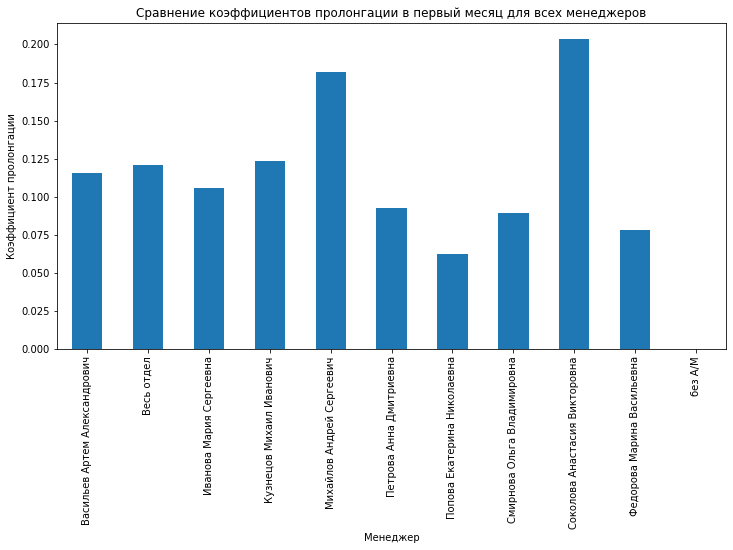

In [27]:
plt.figure(figsize = (12,6))
results_df.groupby('AM')['first_month_coef'].mean().plot(kind='bar')
plt.title('Сравнение коэффициентов пролонгации в первый месяц для всех менеджеров')
plt.xlabel('Менеджер')
plt.ylabel('Коэффициент пролонгации')
plt.show()

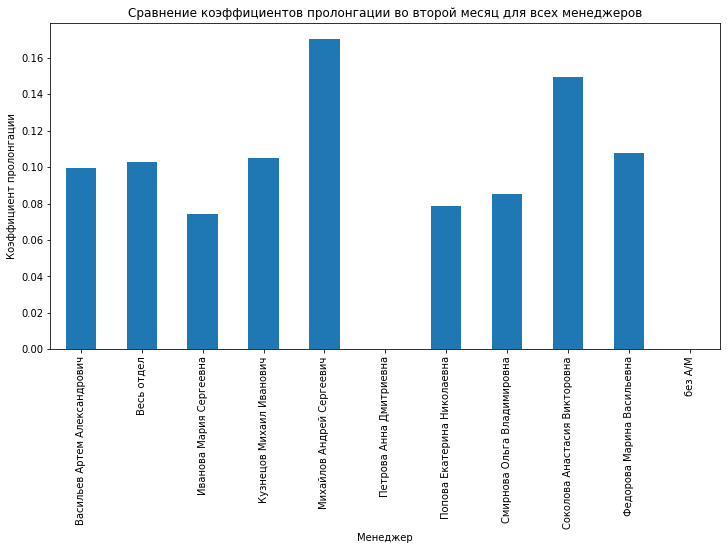

In [28]:
plt.figure(figsize = (12,6))
results_df.groupby('AM')['second_month_coef'].mean().plot(kind='bar')
plt.title('Сравнение коэффициентов пролонгации во второй месяц для всех менеджеров')
plt.xlabel('Менеджер')
plt.ylabel('Коэффициент пролонгации')
plt.show()